Create 4 data clusters centered around a random number between 0 and 1.

In [3]:
import random as rd
import pandas as pd
import numpy as np

k=1000
q=0.6

A=pd.DataFrame(data = np.transpose(np.array([np.random.uniform(0,1,k)-q,np.random.uniform(0,1,k)+q,np.zeros(k,dtype=int)])), columns = ["X","Y","Label"])
B=pd.DataFrame(data = np.transpose(np.array([np.random.uniform(0,1,k)+q,np.random.uniform(0,1,k)+q,np.zeros(k,dtype=int)])), columns = ["X","Y","Label"])
C=pd.DataFrame(data = np.transpose(np.array([np.random.uniform(0,1,k)+q,np.random.uniform(0,1,k)-q,np.zeros(k,dtype=int)])), columns = ["X","Y","Label"])
D=pd.DataFrame(data = np.transpose(np.array([np.random.uniform(0,1,k)-q,np.random.uniform(0,1,k)-q,np.zeros(k,dtype=int)])), columns = ["X","Y","Label"])


Create labels for the clusters by clubbing them alternatively, i.e A and C have the same label(1) and B and D are labelled 0

In [4]:
A["Label"]=1
B["Label"]=0
C["Label"]=1
D["Label"]=0

Concatenate all the dataframes into a single DF

In [6]:
frames = [A,B,C,D]
inputData = pd.concat(frames)

Split the consolidated dataframe into training and test. Standarddize using a Scaler

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputData[["X","Y"]], inputData["Label"])

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Initialize and fit a MLP-Multi Layer Perceptron Classifier using 2 initial features and 2 hidden layers. Predict the labels for the test set using the fitted model

In [129]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2))

In [130]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 2, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [131]:
predictions = mlp.predict(X_test)

Display the confusion matrix and the comparison statistics to understand how the model did. Modify any parameters of MLP Classifier if required(not shown here)

In [132]:
from sklearn.metrics import classification_report,confusion_matrix
conf = confusion_matrix(y_test,predictions)
print(conf)

[[218 288]
 [ 23 471]]


In [133]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.43      0.58       506
          1       0.62      0.95      0.75       494

avg / total       0.76      0.69      0.67      1000



Plot a color map using the predicted data and confirm that there are four distinct quadrants in which the predictions lie

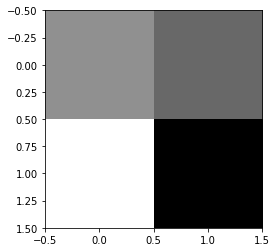

In [134]:
import matplotlib.pyplot as plt

plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

Create labels for the clusters by clubbing them and providing unique levels to each cluster ,i.e A=0, B=1, C=2 and D=3 

In [4]:
A["Label"]=0
B["Label"]=1
C["Label"]=2
D["Label"]=3

Concatenate all the dataframes into a single DF

In [5]:
frames = [A,B,C,D]
inputData = pd.concat(frames)

Split the consolidated dataframe into training and test. Standarddize using a Scaler

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputData[["X","Y"]], inputData["Label"])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Initialize and fit a MLP-Multi Layer Perceptron Classifier using 2 initial features and 2 hidden layers. Predict the labels for the test set using the fitted model

In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(2,2,2))

In [9]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 2, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
predictions = mlp.predict(X_test)

Display the confusion matrix and the comparison statistics to understand how the model did. Modify any parameters of MLP Classifier if required(not shown here). Note here that there are 4 rows and 4 columns, one for each target variable class

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
conf = confusion_matrix(y_test,predictions)
print(conf)

[[230   0   0   0]
 [261   0   0   0]
 [255   0   0   0]
 [254   0   0   0]]


In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.23      1.00      0.37       230
          1       0.00      0.00      0.00       261
          2       0.00      0.00      0.00       255
          3       0.00      0.00      0.00       254

avg / total       0.05      0.23      0.09      1000



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Plot a color map using the predicted data and confirm that there are four distinct quadrants in which the predictions lie

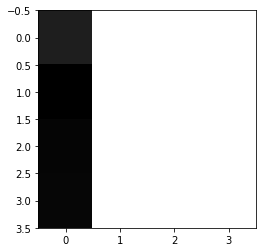

In [15]:
import matplotlib.pyplot as plt

plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()